# Goal: show PCA
* PCA is a dimension reduction method. 
* But how does it work?
* Transform the data into a new coordinate system which maximizes the varriation in the 1st dimension
    * what is a transform. 
    * how does it maximize the varration
    * (show how it really works. )


# Plan
1. generate some data and plot it
2. Generate a normmalized representation of our data. 
3. Show how the `data` matrix multipled by its transpose is the covarriance matrix
2. matrix multiple the data by some random 2x2 matrix to transform it to a new coordinate system. Do this N times and plot. 
3. What matrix/transform would maximize the varriation of our data in the new coordinate system?
4. Show that the eigen vector will do this. 
6. Do PCA
    1. Find the eigenvectors and eigenvalues 
    2. argsort the eigenvalues so the largest is first. Also sort the vectors in the same way. 
    3. Generate a matrix of sorted eigen vectors. 
    4. matrix multiple the data by this matrix. 
    5. Plot the results and calculate the cov matrix. 
    6. Compare to sklearn's PCA



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [146]:
n = 200

# t = np.linspace(-np.pi, np.pi*2, num = n)
# x = np.sin(t)*3#+ np.random.rand(n)*0.1
# y = np.cos(t*4)*1 #+ np.random.rand(n)*0.1
# y = t**2
# x = np.random.rand(n)-0.5
# y = x**2 + np.random.rand(n)*0.1

x = np.linspace(0,5,n)+np.random.rand(n)
y = 2*x + np.random.rand(n)*3

c = (y - y.mean())>0

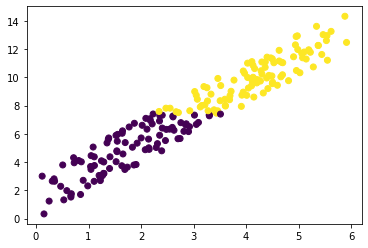

In [147]:
plt.scatter(x,y,c = c)

In [148]:
x,y = [(v - v.mean())/np.var(v) for v in [x,y]]

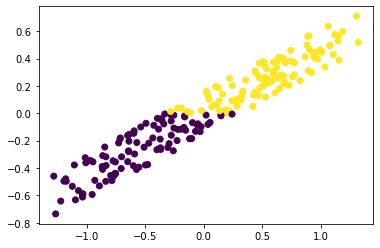

In [149]:
plt.scatter(x,y,c = c)

In [150]:
data = np.stack([x,y])

In [151]:
data.shape

(2, 200)

In [152]:
data_cov = np.cov(data)
data_cov/data_cov.max()

array([[1.        , 0.45928932],
       [0.45928932, 0.22971371]])

In [153]:
data_cov2 = np.matmul(data, data.T)
data_cov2/data_cov2.max()

array([[1.        , 0.45928932],
       [0.45928932, 0.22971371]])

In [154]:
data.shape

(2, 200)

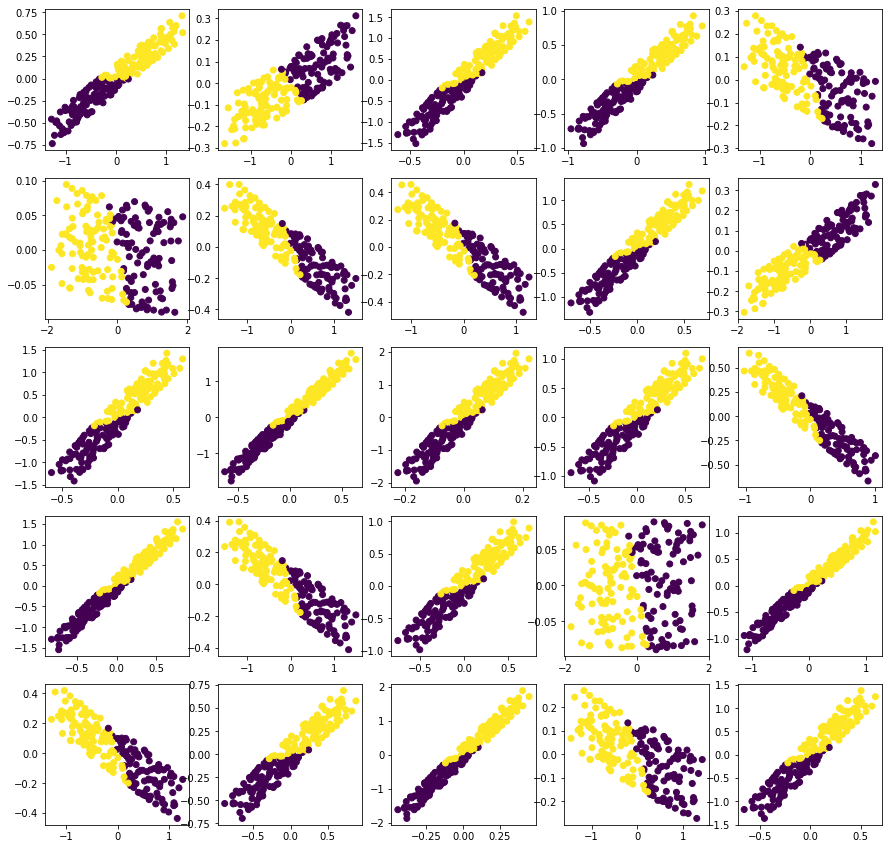

In [155]:
nn = 25
dm1 = np.sqrt(nn).astype(np.int)

fig, ax = plt.subplots(dm1, dm1, figsize = (15,15))
ax = ax.ravel()
cnt = 0
for i in range(dm1):
    for j in range(dm1):
        if cnt ==0:
            # plot the original data as a reference
            ax[cnt].scatter(data[0,:], data[1, :], c = c)
        else:
            # plot the data transformed by a random matrix transform. 
            a = np.random.rand(2,2) # our random matrix transofrm. 
            orth_matrix = LA.eig(a)[1] # the columns will orthogonal
            data2 = np.matmul(orth_matrix, data)
            ax[cnt].scatter(data2[0,:], data2[1, :], c = c)
        cnt += 1

In [163]:
a

array([[0.90489974, 0.60248344],
       [0.55894132, 0.78398904]])

In [164]:
data2.shape

(2, 200)

$$Av = \lambda v$$
$$A(v -I\lambda) = 0 $$

1. get cov matrix
2. get eigne vectors and values
3. sort them so that the vector that goes with the largest eigen value is 1st. 
4. put the vectors into a matrix
5. Use the matrix to transform out data. 

In [165]:
cov = np.cov(data)
cov

array([[0.45164375, 0.20743515],
       [0.20743515, 0.10374876]])

In [166]:
evalues, evectors = LA.eig(cov)

In [167]:
idxs = np.flip( np.argsort(evalues)) # flip so that we get the largest FIRST!
evalues2 = evalues[idxs]
evalues2
evectors2 = evectors[:,idxs]
evectors2

array([[ 0.90624125, -0.42276093],
       [ 0.42276093,  0.90624125]])

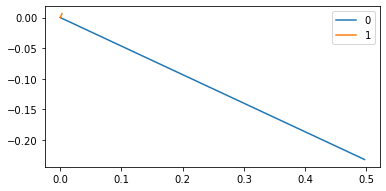

In [168]:
for i,(eval_, evect) in enumerate(zip(evalues2, evectors2)):
    xs = np.array( [0, evect[0]])* eval_ # can't multiple  a scalar times a list
    ys = np.array([0,evect[1]]) * eval_
    plt.plot(xs,ys, label = str(i))
    
plt.legend()
ax = plt.gca()
ax.set_aspect(1)


In [178]:
evectors2

array([[ 0.90624125, -0.42276093],
       [ 0.42276093,  0.90624125]])

In [170]:
evectors2.shape

(2, 2)

In [171]:
# m_transform = np.stack([])
data3 = np.matmul(evectors2.T, data)

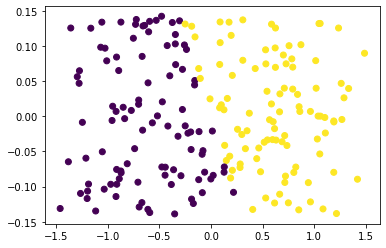

In [172]:
plt.scatter(data3[0,:], data3[1, :], c = c)

In [173]:
from sklearn.decomposition import PCA

In [174]:
pca = PCA(n_components=2)

In [175]:
data4 = pca.fit_transform(data.T).T

In [176]:
data4.shape

(2, 200)

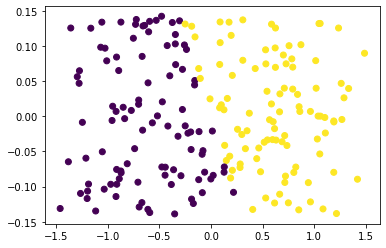

In [177]:
plt.scatter(data4[0,:], data4[1, :], c = c)